In [19]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import pylab as plb

In [20]:
# CHANGE VALUES OF x and y HERE!
x = [0,1,2,3,4,5]
y = [2.1,7.7,13.6,27.2,40.9,61.1]

In [21]:
data = pd.DataFrame(list(zip(x,y)), columns=['x','y'])
print(tabulate(data, headers='keys', tablefmt='psql'))


+----+-----+------+
|    |   x |    y |
|----+-----+------|
|  0 |   0 |  2.1 |
|  1 |   1 |  7.7 |
|  2 |   2 | 13.6 |
|  3 |   3 | 27.2 |
|  4 |   4 | 40.9 |
|  5 |   5 | 61.1 |
+----+-----+------+


In [22]:
# Columns
x2 = list(map(lambda x: x**2, x))
x3 = list(map(lambda x: x**3, x))
x4 = list(map(lambda x: x**4, x))
xy = list(map(lambda x,y: x*y, x,y))
x2y = list(map(lambda x,y: x**2*y, x,y))

n = len(x)
m = 2

# Totals
total_x = sum(x)
total_y = sum(y)
total_x2 = sum(x2)
total_x3 = sum(x3)
total_x4 = sum(x4)
total_xy = sum(xy)
total_x2y = sum(x2y)


prom_y = total_y/len(y)

y_ym2 = list(map(lambda y: (y - prom_y)**2, y))



In [23]:
#Por si necesita la totalidad por filas

#data.loc[:,'Total Filas'] = data.sum(numeric_only=True, axis=1)
#print(tabulate(data, headers='keys', tablefmt='psql'))

In [24]:
# Vector
vector = np.array([[total_y],[total_xy],[total_x2y]])
print(vector)

[[ 152.6]
 [ 585.6]
 [2488.8]]


In [25]:
# Matrix
matrix = np.array([[n,total_x,total_x2],[total_x,total_x2,total_x3],[total_x2,total_x3,total_x4]])
print(matrix)

[[  6  15  55]
 [ 15  55 225]
 [ 55 225 979]]


In [26]:
# Inverse matrix
matrix_inv = np.linalg.inv(matrix) #MATRIZ INVERSA
print(matrix_inv)

[[ 0.82142857 -0.58928571  0.08928571]
 [-0.58928571  0.72678571 -0.13392857]
 [ 0.08928571 -0.13392857  0.02678571]]


In [27]:
a_0 = np.matmul(matrix_inv,vector)[0] #A0
a_1 = np.matmul(matrix_inv,vector)[1] #A1
a_2 = np.matmul(matrix_inv,vector)[2] #A1
print(a_0,a_1,a_2)

[2.47857143] [2.35928571] [1.86071429]


In [28]:
last_colunma = []
last_colunm = list(map(lambda x,y,x2: (y-a_0-a_1*x-a_2*x2)**2, x,y,x2))

for i in last_colunm:
    last_colunma.append(i[0])

total_last_columna = sum(last_colunma)
print(last_colunma)

[0.1433163265304394, 1.0028591836738152, 1.081599999999795, 0.8048653061224611, 0.619593877551183, 0.09433673469373775]


In [29]:
data = pd.DataFrame(list(zip(x,y,x2,x3,x4,xy,x2y,y_ym2,last_colunma)), columns=['x','y','x^2','x^3','x^4','x*y','x^2*y','(y-y*m)^2','(y-a0-a1*x-a2*x^2)^2'])
print(tabulate(data, headers='keys', tablefmt='psql'))

+----+-----+------+-------+-------+-------+-------+---------+-------------+------------------------+
|    |   x |    y |   x^2 |   x^3 |   x^4 |   x*y |   x^2*y |   (y-y*m)^2 |   (y-a0-a1*x-a2*x^2)^2 |
|----+-----+------+-------+-------+-------+-------+---------+-------------+------------------------|
|  0 |   0 |  2.1 |     0 |     0 |     0 |   0   |     0   |   544.444   |              0.143316  |
|  1 |   1 |  7.7 |     1 |     1 |     1 |   7.7 |     7.7 |   314.471   |              1.00286   |
|  2 |   2 | 13.6 |     4 |     8 |    16 |  27.2 |    54.4 |   140.028   |              1.0816    |
|  3 |   3 | 27.2 |     9 |    27 |    81 |  81.6 |   244.8 |     3.12111 |              0.804865  |
|  4 |   4 | 40.9 |    16 |    64 |   256 | 163.6 |   654.4 |   239.218   |              0.619594  |
|  5 |   5 | 61.1 |    25 |   125 |   625 | 305.5 |  1527.5 |  1272.11    |              0.0943367 |
+----+-----+------+-------+-------+-------+-------+---------+-------------+----------------

In [30]:
data.loc['Total']= data.sum(numeric_only=True, axis=0)
print(tabulate(data, headers='keys', tablefmt='psql'))

+-------+-----+-------+-------+-------+-------+-------+---------+-------------+------------------------+
|       |   x |     y |   x^2 |   x^3 |   x^4 |   x*y |   x^2*y |   (y-y*m)^2 |   (y-a0-a1*x-a2*x^2)^2 |
|-------+-----+-------+-------+-------+-------+-------+---------+-------------+------------------------|
| 0     |   0 |   2.1 |     0 |     0 |     0 |   0   |     0   |   544.444   |              0.143316  |
| 1     |   1 |   7.7 |     1 |     1 |     1 |   7.7 |     7.7 |   314.471   |              1.00286   |
| 2     |   2 |  13.6 |     4 |     8 |    16 |  27.2 |    54.4 |   140.028   |              1.0816    |
| 3     |   3 |  27.2 |     9 |    27 |    81 |  81.6 |   244.8 |     3.12111 |              0.804865  |
| 4     |   4 |  40.9 |    16 |    64 |   256 | 163.6 |   654.4 |   239.218   |              0.619594  |
| 5     |   5 |  61.1 |    25 |   125 |   625 | 305.5 |  1527.5 |  1272.11    |              0.0943367 |
| Total |  15 | 152.6 |    55 |   225 |   979 | 585.6 |

In [31]:
#Por si necesita la totalidad por filas

#data.loc[:,'Total Filas'] = data.sum(numeric_only=True, axis=1)
#print(tabulate(data, headers='keys', tablefmt='psql'))

In [32]:
# final equation
y_final = (f'y = {a_0[0]}+{a_1[0]}x+{a_2[0]}x^2')
print(y_final)

y = 2.4785714285712004+2.359285714285761x+1.8607142857142946x^2


In [33]:
# STANDARD ERROR
standard_error = sqrt(total_last_columna/(n-(m+1)))
print(standard_error)

1.1175227706213167


In [34]:
# coefficient of determination
det_coe = (total_x2y - total_last_columna)/total_x2y
print(det_coe)

0.9984946273591404


Text(0.5, 1.0, 'Polynomial regression')

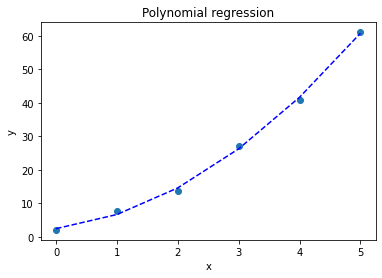

In [35]:
curv = a_0+a_1*x+a_2*x2
plb.scatter(x,y)
plb.plot(x,curv,'b--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression")